In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

base_color = sb.color_palette()[0]

In [3]:
pokemon=pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [27]:
print(pokemon.type_1.value_counts())

water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64


In [6]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                         value_vars=['type_1', 'type_2'],
                         var_name='type_level', 
                         value_name='type').dropna()

In [24]:
pkmn_types.type_level.value_counts()

type_1    807
type_2    405
Name: type_level, dtype: int64

In [31]:
pkmn_types.query('id == 1')

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


In [15]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

<Axes: xlabel='count', ylabel='type'>

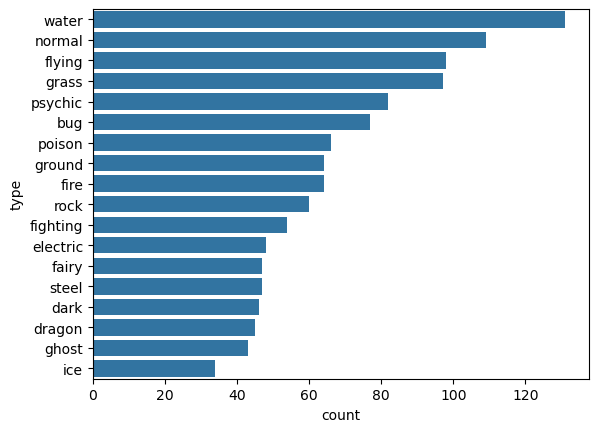

In [16]:
sb.countplot(pkmn_types, y='type', color=base_color, order=type_order)

In [17]:
# To convert from absolute to relative
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

In [20]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

Text(0.5, 0, 'proportion')

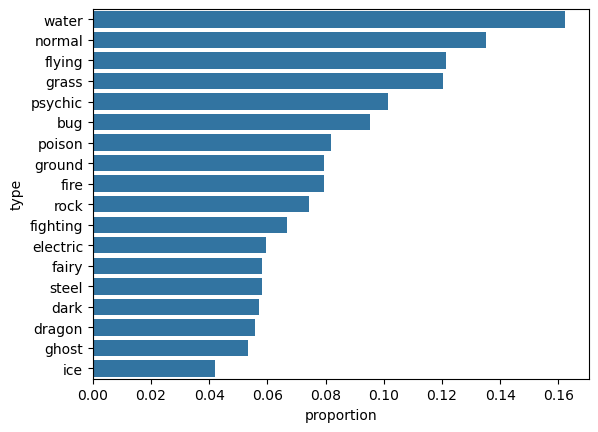

In [21]:
sb.countplot(pkmn_types, y='type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

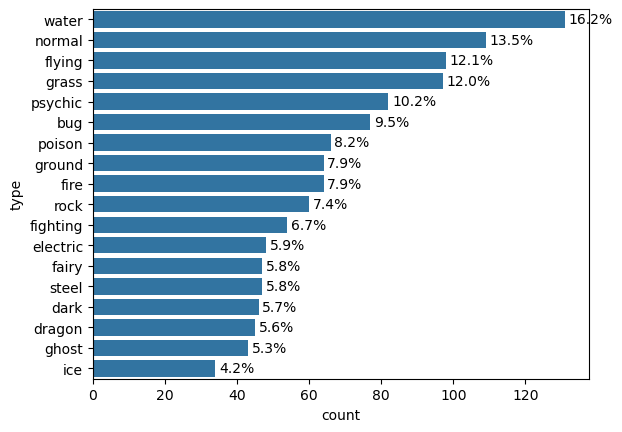

In [22]:
sb.countplot(pkmn_types, y='type', color=base_color, order=type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(count/n_pokemon*100)
    plt.text(count+1, i, pct_string, va='center');